<a href="https://colab.research.google.com/github/hpayettepeterson/foodprint.ai/blob/hannah_branch/CO2_calculator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Making dataframe from recipes_with_nutritional_info.json

## Set up notebook

In [ ]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# enter correct folder
%cd /content/drive/MyDrive/Colab_Notebooks/foodprint.ai

/content/drive/MyDrive/Colab_Notebooks/foodprint.ai


## Make df of recipes

In [ ]:
# get dataset of recipes
import json

recipe_path = 'data/recipes_with_nutritional_info.json'
with open(recipe_path, 'r') as f:
    recipes = json.load(f)

recipes[0].keys()

dict_keys(['fsa_lights_per100g', 'id', 'ingredients', 'instructions', 'nutr_per_ingredient', 'nutr_values_per100g', 'partition', 'quantity', 'title', 'unit', 'url', 'weight_per_ingr'])

Info we need to keep in dataset: id, ingredients, title, weight_per_ingr, (for now not this but maybe add later: nutr_values_per100g). Can maybe add in more info later.

I will make a df with these columns. Or should I make a df for each recipe so that each ingredient can be properly multiplied by weight?

In [ ]:
# loop through all recipes to make lists of values for each key
ids_lst = []
ingredient_lst = []
titles_lst = []
weights_lst = []
for i in range(len(recipes)):
  ids_lst.append(recipes[i]['id'])
  ingredient_lst.append(recipes[i]['ingredients'])
  titles_lst.append(recipes[i]['title'])
  weights_lst.append(recipes[i]['weight_per_ingr'])



In [ ]:
# make ingredients for each recipe into list of strings (might need to change this later to a list of lists)
for i in range(len(ingredient_lst)):
  for n in range(len(ingredient_lst[i])):
    ingredient = ingredient_lst[i][n]['text']
    ingredient_lst[i][n] = ingredient

len(ingredient_lst)

51235

The dataframe below is mostly useful for visualizing the data. It is actually easier to manipulate the data using the lists

In [ ]:
# make lists into df
import pandas as pd

recipes_df = pd.DataFrame(
    {'id': ids_lst,
     'dish_name': titles_lst,
     'ingredients': ingredient_lst,
     'weight_per_ingr': weights_lst
    })

# now, each item of the ingredients list corresponds to the item with the same index in the weight per ingr list
recipes_df.head()

,id,dish_name,ingredients,weight_per_ingr
0,000095fc1d,Yogurt Parfaits,"[yogurt, greek, plain, nonfat, strawberries, r...","[226.796, 152.0, 30.5]"
1,00051d5b9d,"Salt Free, Low Cholesterol Sugar Cookies Recipe","[sugars, granulated, oil, corn, peanut, and ol...","[100.80000000000001, 168.0, 21.25, 5.166666666..."
2,00059b093b,Honey Sriracha Chicken Wings,"[chicken, broilers or fryers, wing, meat and s...","[1360.7759999999998, 6.0, 1.15, 13.5, 42.59999..."
3,0005fc89f7,Shrimp and Caper Salad,"[crustaceans, shrimp, raw (not previously froz...","[907.184, 75.0, 151.5, 25.799999999999997, 134..."
4,0006ca31f4,Natural Peanut Butter Chocolate Bon Bons,"[cocoa, dry powder, unsweetened, honey, peanut...","[1032.0, 4068.0, 256.0]"


In [ ]:
# make list of total dish weights by summing ingredients
dish_weights = []

for i in range(len(weights_lst)):
  dish_weights.append(sum(weights_lst[i]))

len(dish_weights)

51235

In [ ]:
import numpy as np
dish_weights_arr = np.array(dish_weights)
len(dish_weights_arr)

51235

In [ ]:
recipes[3758]

{'fsa_lights_per100g': {'fat': 'orange',
  'salt': 'green',
  'saturates': 'orange',
  'sugars': 'orange'},
 'id': '12bc400a54',
 'ingredients': ['wheat flour, white, all-purpose, unenriched',
  'shortening, vegetable, household, composite',
  'water, bottled, generic',
  'salt, table',
  'butter, without salt',
  'apples, raw, with skin',
  'spices, cinnamon, ground',
  'spices, nutmeg, ground',
  'wheat flour, white, all-purpose, unenriched',
  'lemon juice, raw',
  'sugars, brown',
  'sugars, granulated'],
 'instructions': [{'text': 'Roll crust in strips.'},
  {'text': "Pat together in an 18' round x 18 inch deep pan."},
  {'text': "Bake in 19'round x 19 inch deep cinder block oven at 350F (180C) to 400 degrees until done."}],
 'nutr_per_ingredient': [{'fat': 1564.7109632,
   'nrg': 581178.35776,
   'pro': 16493.3308672,
   'sat': 247.47979519999998,
   'sod': 3193.28768,
   'sug': 431.0938368},
  {'fat': 59856.181756800004,
   'nrg': 529287.43296,
   'pro': 0.0,
   'sat': 14956.561

In [ ]:
ingredient_lst[0]

['yogurt, greek, plain, nonfat',
 'strawberries, raw',
 'cereals ready-to-eat, granola, homemade']

In [ ]:
# create new column with total weight of dish (I think units are in grams?)
recipes_df['total_dish_weight'] = dish_weights
recipes_df.head()

,id,dish_name,ingredients,weight_per_ingr,total_dish_weight
0,000095fc1d,Yogurt Parfaits,"[yogurt, greek, plain, nonfat, strawberries, r...","[226.796, 152.0, 30.5]",409.296000
1,00051d5b9d,"Salt Free, Low Cholesterol Sugar Cookies Recipe","[sugars, granulated, oil, corn, peanut, and ol...","[100.80000000000001, 168.0, 21.25, 5.166666666...",747.808333
2,00059b093b,Honey Sriracha Chicken Wings,"[chicken, broilers or fryers, wing, meat and s...","[1360.7759999999998, 6.0, 1.15, 13.5, 42.59999...",1579.409333
3,0005fc89f7,Shrimp and Caper Salad,"[crustaceans, shrimp, raw (not previously froz...","[907.184, 75.0, 151.5, 25.799999999999997, 134...",1574.431917
4,0006ca31f4,Natural Peanut Butter Chocolate Bon Bons,"[cocoa, dry powder, unsweetened, honey, peanut...","[1032.0, 4068.0, 256.0]",5356.000000


In [ ]:
ingredient_lst[0]

['yogurt, greek, plain, nonfat',
 'strawberries, raw',
 'cereals ready-to-eat, granola, homemade']

# Make df of co2 info

In [ ]:
# load csv
co2_df = pd.read_csv('table_co2_v2.csv')  

In [ ]:
co2_df.columns

Index(['ingredients', 'category', 'C02_per_kilo'], dtype='object')

In [ ]:
co2_df.head()

,ingredients,category,C02_per_kilo
0,tomato sauce,sauces,1.6
1,tomato paste,sauces,1.6
2,american cheese,cheese,11.3
3,beef broth,broth,0.5
4,chicken broth,broth,0.5


In [ ]:
co2_df["CO2_per_kilo"] = pd.to_numeric(co2_df["C02_per_kilo"], downcast="float") # change co2 per kilo to float
co2_df.drop(columns='C02_per_kilo', inplace=True) # fix column naming

co2_df.head()

,ingredients,category,CO2_per_kilo
0,tomato sauce,sauces,1.6
1,tomato paste,sauces,1.6
2,american cheese,cheese,11.3
3,beef broth,broth,0.5
4,chicken broth,broth,0.5


In [ ]:
# create co2 per gram column
co2_df['CO2_per_gram'] = co2_df['CO2_per_kilo'] / 1000
co2_df.head()

,ingredients,category,CO2_per_kilo,CO2_per_gram
0,tomato sauce,sauces,1.6,0.0016
1,tomato paste,sauces,1.6,0.0016
2,american cheese,cheese,11.3,0.0113
3,beef broth,broth,0.5,0.0005
4,chicken broth,broth,0.5,0.0005


In [ ]:
# make list of all ingredients
all_ingredients = co2_df['ingredients'].tolist()
len(all_ingredients)

3521

In [ ]:
# make list of co2 values per ingredient
co2_per_gram = co2_df['CO2_per_gram'].tolist()
len(co2_per_gram)

3521

# Calculating CO2 per ingredient

In [ ]:
# checking format of ingredients
ingredient_lst[0]

['yogurt, greek, plain, nonfat',
 'strawberries, raw',
 'cereals ready-to-eat, granola, homemade']

## Calculate carbon footprint per ingredient

In [ ]:
# calculate carbon footprint per ingredient

footprints_per_dish = [] # list of lists of co2 per ingredient

for recipe_number, ingredients in enumerate(ingredient_lst): # get the list of ingredients of each recipe
  footprints_lst = []
  for ingr_number, ingredient in enumerate(ingredients): # get each single ingredient
    for food_index, food in enumerate(all_ingredients): # go thru foods we are searching for
      if len(footprints_lst) != (ingr_number): # check if there is no match for ingredient
        footprints_lst.append(False) # mark ingredient as unmatched
      if food in ingredient: # see if food is in ingredients
        footprint_per_ingr = weights_lst[recipe_number][ingr_number] * co2_per_gram[food_index] # multiply to get co2 per ingredient
        footprints_lst.append(footprint_per_ingr) # make list of ingr footprints for each dish
        break # get only one match per ingredient    
  footprints_per_dish.append(footprints_lst) # make list of lists for footprint per ingredient
  
  # total_footprint_for_dish = sum(footprints_lst)
  # dish_footprints.append(total_footprint_for_dish)

footprints_per_dish

[[0.3401940029570833, 0.13679999765008688, 0.04575000039767474],
 [0.35280001088976864,
  0.5040000043809414,
  0.0807500013615936,
  0.00888666696846485,
  0.0022216667421162124,
  0.022080001048743723,
  0.21875001039006747],
 [6.123491736397146,
  0.009600000455975533,
  0.002874999935738742,
  0.027000001282431185,
  0.04984199765603989,
  0.12480000592768192,
  0.0423750020127045,
  0.026662500691600144,
  0.009600000455975533,
  0.008533333738644917,
  0.004800000227987766,
  0.01728000082075596],
 [4.898793727070093,
  0.037500001781154424,
  0.01817999954073457,
  False,
  0.2688000127673149,
  0.21600001025944948,
  0.3974400188773871,
  0.0007574999808639404,
  0.0010929167037829757],
 [False, 4.068000193219632, 0.29951998591423035],
 [1.9220961615918202,
  6.026800101622939,
  0.13440000638365743,
  2.764800131320954e-05],
 [0.1462834249678999,
  0.9610480807959101,
  0.07166249662986957,
  2.822400087118149,
  0.004800000227987766],
 [0.47100000409409404,
  0.04687500222644

## Calculate total footprint per dish & confidence scores

Confidence score is percentage of weight of the dish which is accounted for in our data

In [ ]:
confidence_scores = [] # percentage of weight which is accounted for in our data
dish_footprints = [] # total footprint per each dish

for recipe_number, ingredients in enumerate(footprints_per_dish):
  if False in ingredients:
    ingr_number = ingredients.index(False)
    confidence_score = 1 - (weights_lst[recipe_number][ingr_number] / dish_weights[recipe_number]) # get percentage of total weight for unmatched ingredient
    ingredients.remove(False) # get rid of false
    total_footprint_for_dish = sum(ingredients) # get sum of ingredient footprints 
  else:
    confidence_score = 1
    total_footprint_for_dish = sum(ingredients)
  confidence_scores.append(confidence_score)
  dish_footprints.append(total_footprint_for_dish)

np.unique(confidence_scores)

array([4.13196277e-04, 1.86028290e-03, 1.99756425e-03, ...,
       9.99982562e-01, 9.99990909e-01, 1.00000000e+00])

## Get CO2 footprint per gram, per 100g and per kilo

In [ ]:
dish_footprints_arr = np.array(dish_footprints)
dish_weights_arr = np.array(dish_weights)

dish_footprint_per_gr = dish_footprints_arr / dish_weights_arr # calculate dish footprint per gram
dish_footprint_per_100gr = dish_footprint_per_gr * 100

In [ ]:
# add to df
recipes_df['total_footprint'] = dish_footprints
recipes_df['dish_footprint_per_100gr'] = dish_footprint_per_100gr
recipes_df['confidence_score'] = confidence_scores
recipes_df.head()

,id,dish_name,ingredients,weight_per_ingr,total_dish_weight,total_footprint,dish_footprint_per_100gr,confidence_score
0,000095fc1d,Yogurt Parfaits,"[yogurt, greek, plain, nonfat, strawberries, r...","[226.796, 152.0, 30.5]",409.296000,0.522744,0.127718,1.000000
1,00051d5b9d,"Salt Free, Low Cholesterol Sugar Cookies Recipe","[sugars, granulated, oil, corn, peanut, and ol...","[100.80000000000001, 168.0, 21.25, 5.166666666...",747.808333,1.189488,0.159063,1.000000
2,00059b093b,Honey Sriracha Chicken Wings,"[chicken, broilers or fryers, wing, meat and s...","[1360.7759999999998, 6.0, 1.15, 13.5, 42.59999...",1579.409333,6.446860,0.408182,1.000000
3,0005fc89f7,Shrimp and Caper Salad,"[crustaceans, shrimp, raw (not previously froz...","[907.184, 75.0, 151.5, 25.799999999999997, 134...",1574.431917,5.838564,0.370836,0.983613
4,0006ca31f4,Natural Peanut Butter Chocolate Bon Bons,"[cocoa, dry powder, unsweetened, honey, peanut...","[1032.0, 4068.0, 256.0]",5356.000000,4.367520,0.081544,0.807319


In [ ]:
dish_footprint_per_kilo = dish_footprint_per_100gr * 10
recipes_df['dish_footprint_per_kilo'] = dish_footprint_per_kilo

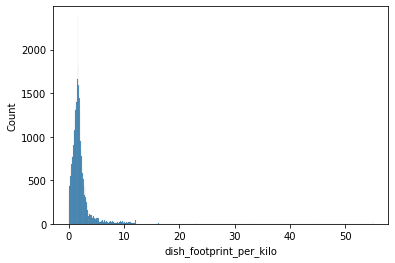

In [ ]:
# visualize distribution of footprints per kilo
import seaborn as sns
sns.histplot(data=recipes_df['dish_footprint_per_kilo'])


In [ ]:
np.mean(dish_footprint_per_kilo)

2.429737841014982

## Implement carbon footprint scoring

In [ ]:
# implement co2 scoring
# lower than 2 kilos per kilo = low
# lower than 3 = med
# higher than 3 = high

co2_scores_lst = []

for footprint in dish_footprint_per_kilo:
  if footprint < 2:
    co2_scores_lst.append('low')
  elif footprint < 3: 
    co2_scores_lst.append('moderate')
  else:
    co2_scores_lst.append('high')



In [ ]:
recipes_df['co2_score'] = co2_scores_lst
recipes_df.head()

,id,dish_name,ingredients,weight_per_ingr,total_dish_weight,total_footprint,dish_footprint_per_100gr,confidence_score,dish_footprint_per_kilo,co2_score
0,000095fc1d,Yogurt Parfaits,"[yogurt, greek, plain, nonfat, strawberries, r...","[226.796, 152.0, 30.5]",409.296000,0.522744,0.127718,1.000000,1.277178,low
1,00051d5b9d,"Salt Free, Low Cholesterol Sugar Cookies Recipe","[sugars, granulated, oil, corn, peanut, and ol...","[100.80000000000001, 168.0, 21.25, 5.166666666...",747.808333,1.189488,0.159063,1.000000,1.590633,low
2,00059b093b,Honey Sriracha Chicken Wings,"[chicken, broilers or fryers, wing, meat and s...","[1360.7759999999998, 6.0, 1.15, 13.5, 42.59999...",1579.409333,6.446860,0.408182,1.000000,4.081817,high
3,0005fc89f7,Shrimp and Caper Salad,"[crustaceans, shrimp, raw (not previously froz...","[907.184, 75.0, 151.5, 25.799999999999997, 134...",1574.431917,5.838564,0.370836,0.983613,3.708362,high
4,0006ca31f4,Natural Peanut Butter Chocolate Bon Bons,"[cocoa, dry powder, unsweetened, honey, peanut...","[1032.0, 4068.0, 256.0]",5356.000000,4.367520,0.081544,0.807319,0.815444,low


In [ ]:
total_ingredients_count = 0
for i in range(len(ingredient_lst)):
  for n in range(len(ingredient_lst[i])):
    total_ingredients_count += 1
total_ingredients_count

311435

In [ ]:
# only a very small number of ingredients are not able to be matched to ingredients in our database
false_count= 781
(false_count/total_ingredients_count) * 100

0.25077463997302807

In [ ]:
recipes_df.columns

Index(['id', 'dish_name', 'ingredients', 'weight_per_ingr',
       'total_dish_weight', 'total_footprint', 'dish_footprint_per_100gr',
       'confidence_score', 'dish_footprint_per_kilo', 'co2_score'],
      dtype='object')

## Calculate co2 equivalent to number of km driven

1kg = 3.875km

In [ ]:
# co2 equivalent to number of km driven per 100gr

km_driven_per_100gr = dish_footprint_per_100gr * 3.875
recipes_df['km_driven_per_100gr'] = km_driven_per_100gr
recipes_df.head()

,id,dish_name,ingredients,weight_per_ingr,total_dish_weight,total_footprint,dish_footprint_per_100gr,confidence_score,dish_footprint_per_kilo,co2_score,km_driven_per_100gr
0,000095fc1d,Yogurt Parfaits,"[yogurt, greek, plain, nonfat, strawberries, r...","[226.796, 152.0, 30.5]",409.296000,0.522744,0.127718,1.000000,1.277178,low,0.494907
1,00051d5b9d,"Salt Free, Low Cholesterol Sugar Cookies Recipe","[sugars, granulated, oil, corn, peanut, and ol...","[100.80000000000001, 168.0, 21.25, 5.166666666...",747.808333,1.189488,0.159063,1.000000,1.590633,low,0.616370
2,00059b093b,Honey Sriracha Chicken Wings,"[chicken, broilers or fryers, wing, meat and s...","[1360.7759999999998, 6.0, 1.15, 13.5, 42.59999...",1579.409333,6.446860,0.408182,1.000000,4.081817,high,1.581704
3,0005fc89f7,Shrimp and Caper Salad,"[crustaceans, shrimp, raw (not previously froz...","[907.184, 75.0, 151.5, 25.799999999999997, 134...",1574.431917,5.838564,0.370836,0.983613,3.708362,high,1.436990
4,0006ca31f4,Natural Peanut Butter Chocolate Bon Bons,"[cocoa, dry powder, unsweetened, honey, peanut...","[1032.0, 4068.0, 256.0]",5356.000000,4.367520,0.081544,0.807319,0.815444,low,0.315985


# Save df to csv

In [ ]:
recipes_df.to_csv('dishes_with_co2.csv', index=False)